In [59]:
import os.path
from IPython.display import FileLink, FileLinks
from datetime import datetime
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import collections
import operator
FileLinks('.')

input_path_movies = os.path.join('Movies', 'movies.dat')
input_path_ratings = os.path.join('Movies', 'ratings.dat.gz')


raw_data = sc.textFile(input_path_movies)
raw_ratings = sc.textFile(input_path_ratings)

header1 = raw_data.take(2)
header2 = raw_ratings.take(2)

#MovieID, Movie (Year), [Genre]
data = raw_data.collect()
#PersonID, MovieID, Rating, Timestamp
ratings = raw_ratings.collect()

In [60]:
def avg_rating_movie(movie_index):
    movie_id = movie_index
    i = 0
    sum = 0
    for movie in ratings:
        vals = movie.split('::')
        if vals[1] == movie_id:
            i += 1
            sum += float(vals[2])
    return round(float(sum/i),2)

In [61]:
def get_actual_movie_name(movie_id):
    movie_name = get_movie_name(movie_id)
    comma = ','
    if comma in movie_name:
        movie_name = movie_name.split(',')
        date = movie_name[1][-6:]
        movie = movie_name[1][:-6] + movie_name[0] + " " + date
    else:
        movie = " " + movie_name
    return movie

In [62]:
def get_movie_index(movie_name):
    for movie in data:
        vals = movie.split('::')
        if vals[1].startswith(movie_name):
            return vals[0]
            break       

In [63]:
def get_movie_name(movie_index):
    for movie in data:
        vals = movie.split('::')
        if vals[0] == movie_index:
            return vals[1]  

In [64]:
def avg_rating(movie_name):
    movie_index = get_movie_index(movie_name)
    
    res = {}
    i = 0
    sum = 0
    average_rating = 0
    
    for movie in ratings:
        vals = movie.split('::')
        if vals[1] == movie_index:
            i += 1
            sum +=  float(vals[2])
            res[i] = float(round((sum/i), 2))
            average_rating = res[i]
    
    return average_rating

In [65]:
def all_years():
    res = {}
    i = 1
    for movie in data:
        vals = movie.split('::')
        actual_year = vals[1][-5:]
        year = actual_year[:4]
        if year not in res.values():
            res[i] = year
            i += 1
    return res

In [66]:
def get_top_movie(input_year, genre):
    res = {}
    for movie in data:
        vals = movie.split('::')
        year = '(' + input_year + ')'
        movie_id = get_movie_index(vals[1])
        if year in vals[1] and genre in vals[2]:
            movie_rating = avg_rating(vals[1]) 
            movie_name = get_actual_movie_name(movie_id)
            movie_name = movie_name[:-6]
            res[movie_name] = movie_rating

    res = dict(sorted(res.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])
    plt.figure(figsize=(15,7))
    plt.bar(range(len(res)), res.values(), align="center", color = "g", width = 0.3)
    plt.xticks(range(len(res)), list(res.keys()))
    plt.yticks(range(6))
    plt.ylabel('Rating', fontsize=11, fontweight='bold')
    plt.suptitle('Top 5 ' + genre + ' movies of ' + input_year, fontsize=14, fontweight='bold')
    plt.show()
    pass

In [67]:
def get_bottom_movie(input_year, genre):
    res = {}
    for movie in data:
        vals = movie.split('::')
        year = '(' + input_year + ')'
        movie_id = get_movie_index(vals[1])
        if year in vals[1] and genre in vals[2]:
            movie_rating = avg_rating(vals[1]) 
            movie_name = get_actual_movie_name(movie_id)
            movie_name = movie_name[:-6]
            res[movie_name] = movie_rating

    res = dict(sorted(res.iteritems(), key=operator.itemgetter(1), reverse=False)[:5])
    plt.figure(figsize=(15,7))
    plt.bar(range(len(res)), res.values(), align="center", color = "r", width = 0.3)
    plt.xticks(range(len(res)), list(res.keys()))
    plt.yticks(range(6))
    plt.ylabel('Rating', fontsize=11, fontweight='bold')
    plt.suptitle('Worst 5 ' + genre + ' movies of ' + input_year, fontsize=14, fontweight='bold')
    plt.show()
    pass

In [71]:
year = "1996"
genre = "Children's"

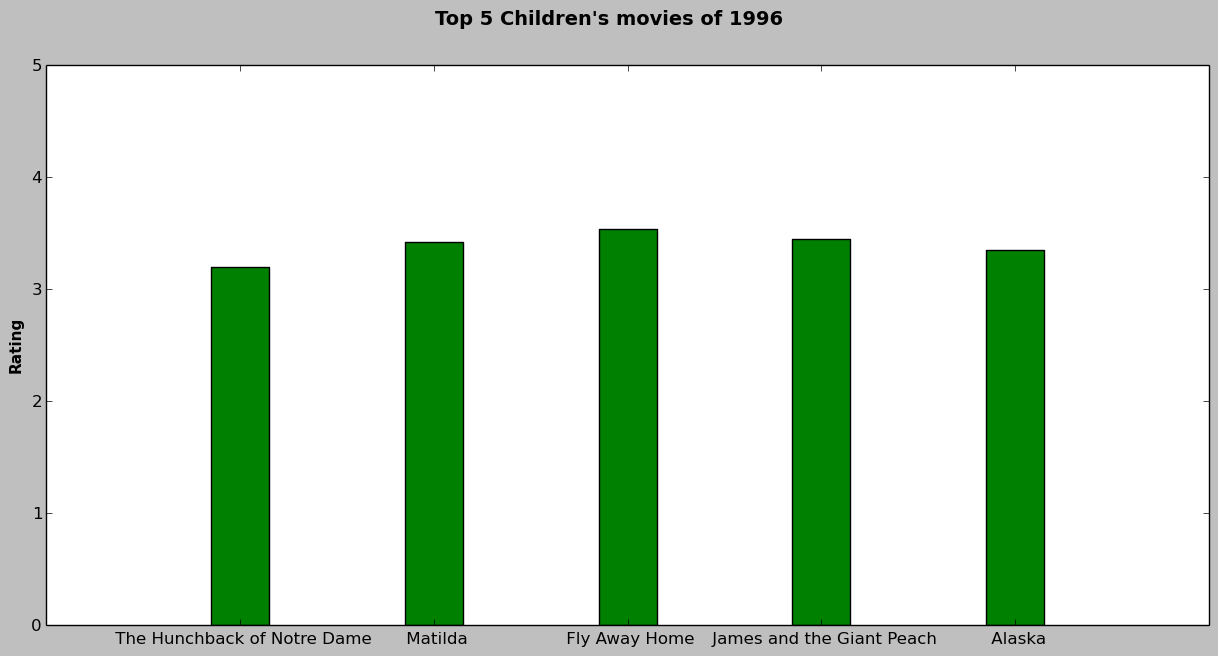

In [72]:
get_top_movie(year, genre)

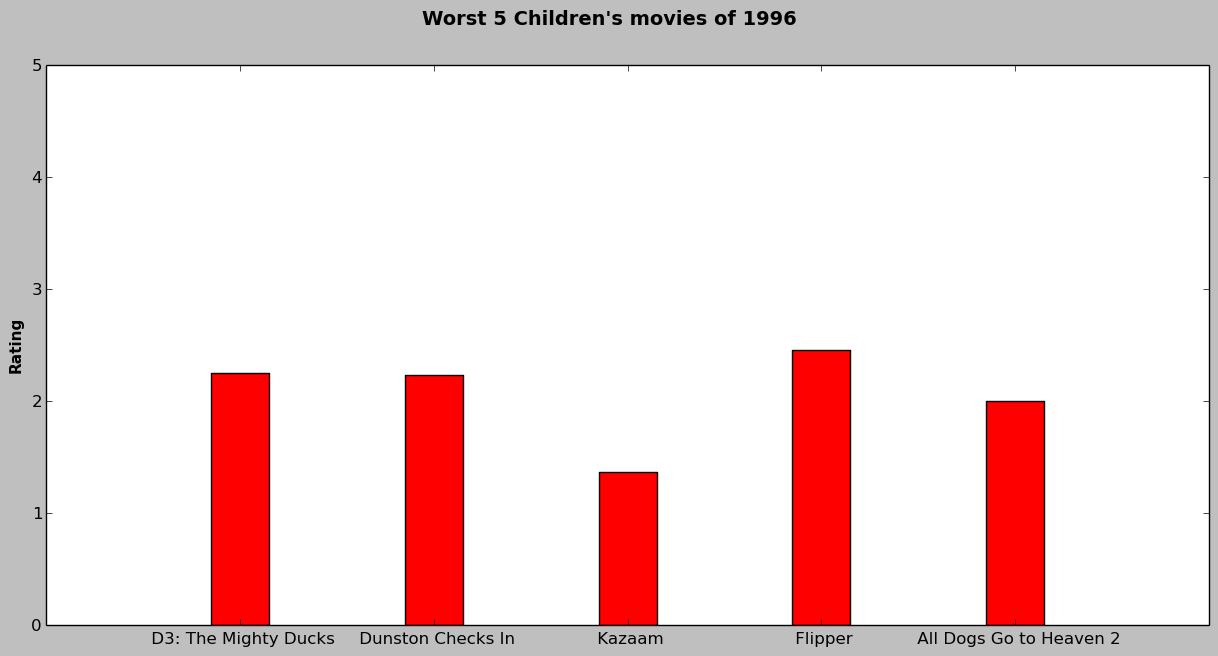

In [73]:
get_bottom_movie(year, genre)